In [6]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sn

In [7]:
path  = "amazon food Reviews.csv"

In [8]:
data = pd.read_csv(path)

In [9]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [10]:
data = data[['Text' , 'Score']]
data.head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [11]:
data.duplicated().sum()

174779

In [12]:
data = data.drop_duplicates()

In [13]:
data.duplicated().sum()

0

In [14]:
data.isnull().sum()

Text     0
Score    0
dtype: int64

In [15]:
positive_review = data[data['Score'] > 2].shape[0]
negative_review = data[data['Score'] < 2].shape[0]

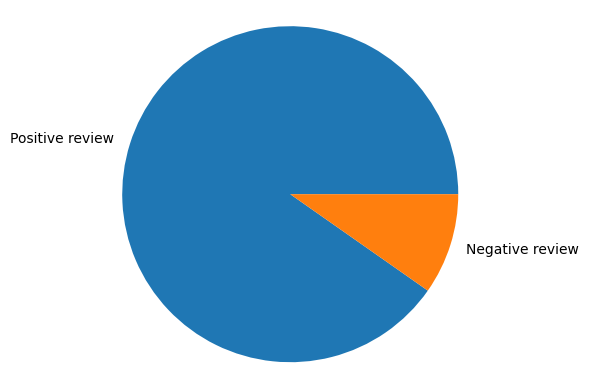

In [16]:
sizes = [positive_review, negative_review]
labels = ['Positive review', 'Negative review']

plt.pie(sizes, labels=labels)
plt.axis('equal')
plt.show()

In [17]:
data['reviews'] = nm.where(data['Score'] > 2, 1, 0)
#if the Score is getter then 2 then its good review and its 1 
#if the Score is less then 2 then its bad review and its 0

In [18]:
data['reviews'].value_counts()

reviews
1    336591
0     57084
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x206eda8c5d0>,
 [Text(-0.9878260126229064, 0.48394190641597673, 'Positive review'),
  Text(0.9878260352778611, -0.48394186017250285, 'Negative review')])

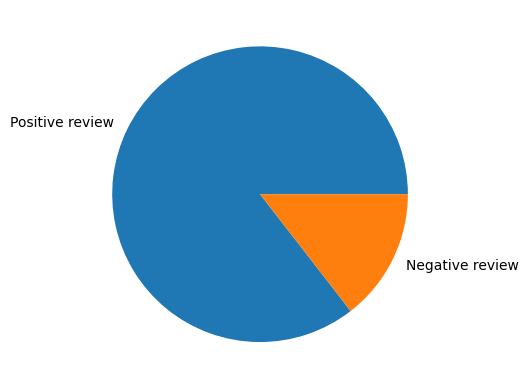

In [19]:
labels = ['Positive review', 'Negative review']
plt.pie(labels=labels , x = data['reviews'].value_counts())

In [20]:
data  = data.drop('Score' , axis= 1)

In [21]:
data.head()

,Text,reviews
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


In [22]:
from wordcloud import WordCloud

In [23]:
positive_reviews = ' '.join(data[data['reviews'] == 1]['Text'])
negative_reviews = ' '.join(data[data['reviews'] == 0]['Text'])

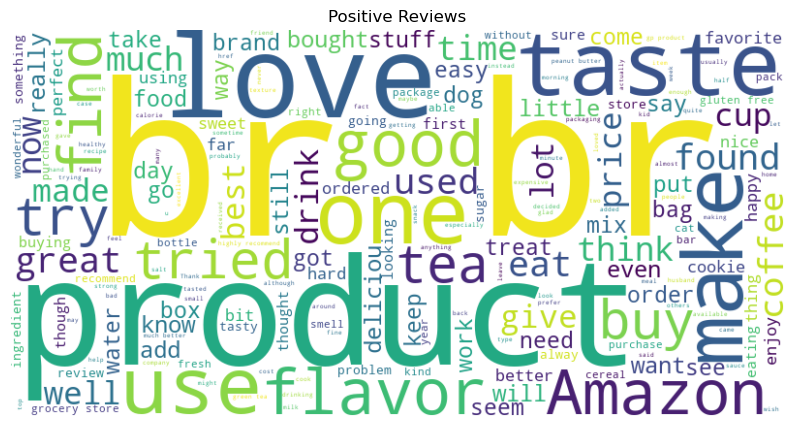

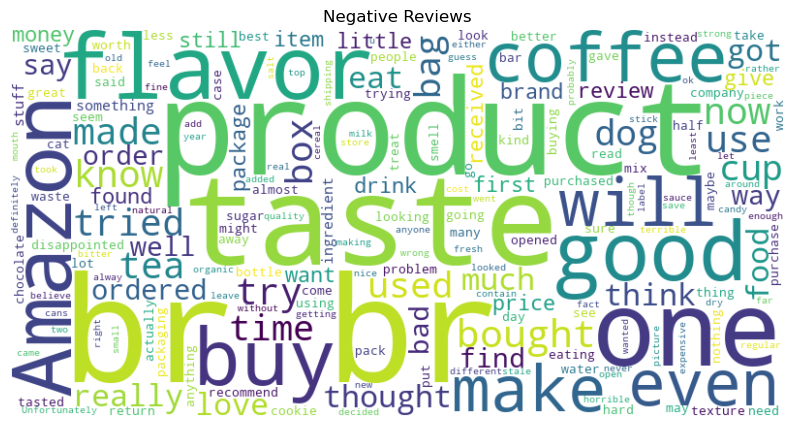

In [24]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews")
plt.show()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews")
plt.show()

In [25]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import plotly.express as px
import string
import nltk
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ovi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
def preprocess_text(text):
    # Step 1: Remove punctuation
    preprocess_punctuation = "".join([char for char in text if char not in string.punctuation])
    
    # Step 2: Remove stopwords
    stopword = set(stopwords.words('english'))
    preprocess_stopword = [word for word in preprocess_punctuation.split() if word.lower() not in stopword]
    
    # Step 3: Lemmatize words
    lemmatizer = WordNetLemmatizer()
    normalized_text = ' '.join([lemmatizer.lemmatize(word) for word in preprocess_stopword])
    
    return normalized_text

In [27]:
data['Text'] = data['Text'].apply(preprocess_text)

In [28]:
data['Text']

0         bought several Vitality canned dog food produc...
1         Product arrived labeled Jumbo Salted Peanutsth...
2         confection around century light pillowy citrus...
3         looking secret ingredient Robitussin believe f...
4         Great taffy great price wide assortment yummy ...
                                ...                        
568449    Great sesame chickenthis good better resturant...
568450    Im disappointed flavor chocolate note especial...
568451    star small give 1015 one training session trie...
568452    BEST treat training rewarding dog good groomin...
568453    satisfied product advertised use cereal raw vi...
Name: Text, Length: 393675, dtype: object

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
Vectorizer = TfidfVectorizer()

In [31]:
x  = Vectorizer.fit_transform(data['Text'])
y = data['reviews']

In [32]:
from imblearn.over_sampling import RandomOverSampler
rnd = RandomOverSampler()

In [33]:
x , y = rnd.fit_resample(x , y)

([<matplotlib.patches.Wedge at 0x2068b0a50d0>,
 [Text(6.735557395310444e-17, 1.1, 'Positive review'),
  Text(-2.0206672185931328e-16, -1.1, 'Negative review')])

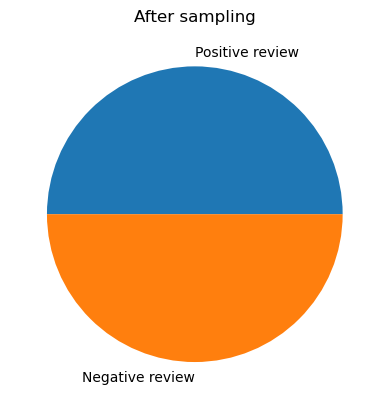

In [34]:
plt.title("After sampling")
label = ["Positive review" , "Negative review"]
value = y.value_counts()
plt.pie(labels= label , x = value)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
xtrain , xtest , ytrain , ytest  = train_test_split(x, y ,random_state=41 , test_size=.31)

In [37]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 
from sklearn.linear_model import LogisticRegression
mn = MultinomialNB()
bn = BernoulliNB()
lr = LogisticRegression()

In [38]:
mn.fit(xtrain , ytrain)

MultinomialNB()

In [39]:
bn.fit(xtrain , ytrain)

BernoulliNB()

In [40]:
lr.fit(xtrain , ytrain)

C:\Users\Ovi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
print("MultinomialNB Train Score" , mn.score(xtrain , ytrain))
print("BernoulliNB Train Score" , bn.score(xtrain , ytrain))
print("LogisticRegression Train Score" , lr.score(xtrain , ytrain))
print("MultinomialNB Test Score" , mn.score(xtest , ytest))
print("BernoulliNB Test Score" , bn.score(xtest , ytest))
print("LogisticRegression Test Score" , lr.score(xtest , ytest))

MultinomialNB Train Score 0.8846618370488379
BernoulliNB Train Score 0.8711374718780611
LogisticRegression Train Score 0.9048106007599651
MultinomialNB Test Score 0.8700254448048992
BernoulliNB Test Score 0.8588795660486758
LogisticRegression Test Score 0.8934528744004179


In [42]:
from sklearn.metrics import confusion_matrix , classification_report

In [43]:
print("MultinomialNB" , classification_report(ytest , mn.predict(xtest)))
print("BernoulliNB" , classification_report(ytest , bn.predict(xtest)))
print("LogisticRegression" ,classification_report(ytest , lr.predict(xtest)))

MultinomialNB               precision    recall  f1-score   support

           0       0.86      0.88      0.87    104390
           1       0.88      0.86      0.87    104297

    accuracy                           0.87    208687
   macro avg       0.87      0.87      0.87    208687
weighted avg       0.87      0.87      0.87    208687

BernoulliNB               precision    recall  f1-score   support

           0       0.88      0.83      0.86    104390
           1       0.84      0.88      0.86    104297

    accuracy                           0.86    208687
   macro avg       0.86      0.86      0.86    208687
weighted avg       0.86      0.86      0.86    208687

LogisticRegression               precision    recall  f1-score   support

           0       0.88      0.91      0.89    104390
           1       0.90      0.88      0.89    104297

    accuracy                           0.89    208687
   macro avg       0.89      0.89      0.89    208687
weighted avg       0.89      

In [44]:
cm_MultinomialNB = confusion_matrix(ytest , mn.predict(xtest))
cm_BernoulliNB = confusion_matrix(ytest , bn.predict(xtest))
cm_LogisticRegression = confusion_matrix(ytest , lr.predict(xtest))

MultinomialNB


<Axes: >

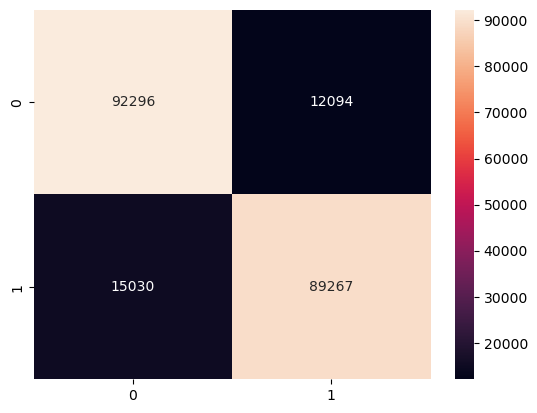

In [45]:
print("MultinomialNB")
sn.heatmap(cm_MultinomialNB , annot=True , fmt = "d")

BernoulliN


<Axes: >

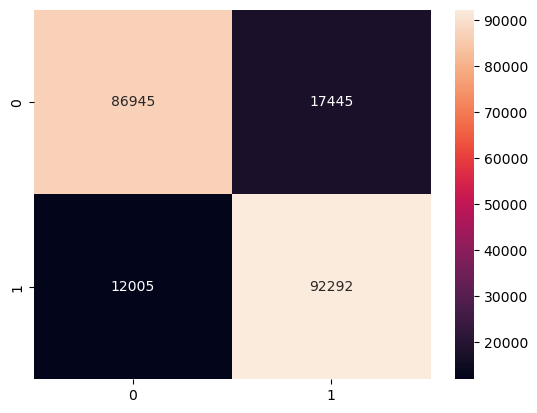

In [46]:
print("BernoulliN")
sn.heatmap(cm_BernoulliNB , annot=True , fmt = "d")

LogisticRegression


<Axes: >

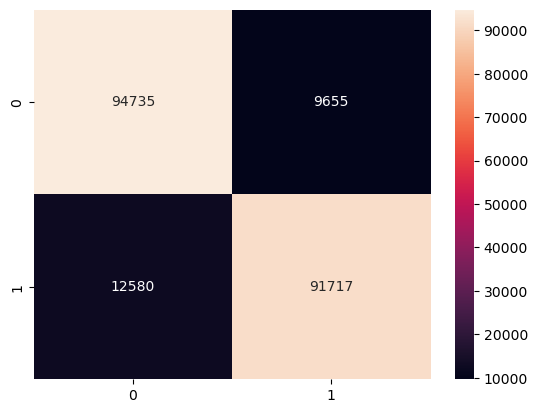

In [47]:
print("LogisticRegression")
sn.heatmap(cm_LogisticRegression , annot=True , fmt = "d")

In [48]:
from sklearn.metrics import RocCurveDisplay

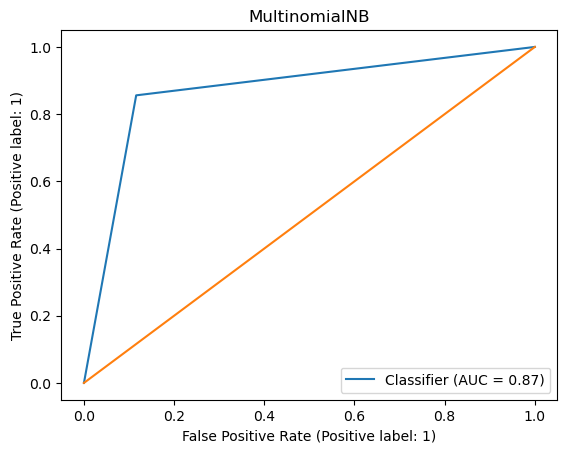

In [49]:
RocCurveDisplay.from_predictions(ytest , mn.predict(xtest))
plt.title("MultinomialNB")
plt.plot([0,1],[0,1])

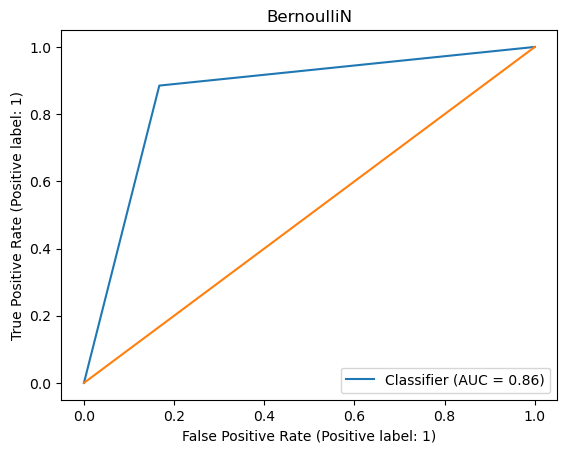

In [50]:
RocCurveDisplay.from_predictions(ytest , bn.predict(xtest))
plt.title("BernoulliN")
plt.plot([0,1],[0,1])

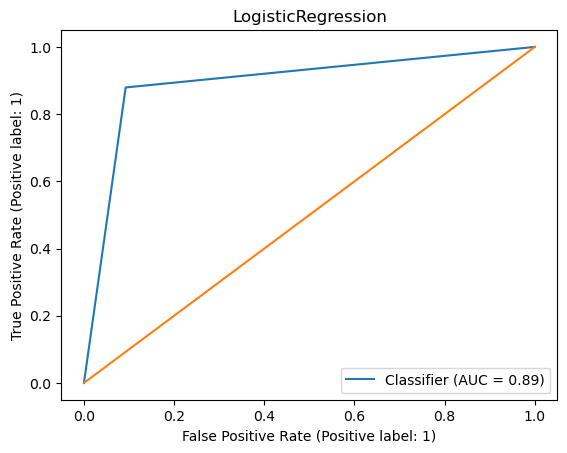

In [51]:
RocCurveDisplay.from_predictions(ytest , lr.predict(xtest))
plt.title("LogisticRegression")
plt.plot([0,1],[0,1])